**Cientista de Dados EBAC** -> Exercício Módulo 7

# 0. Preparação do ambiente

## Neste exercício vamos utilizar a base de dados de ações da bolsa de valores dos EUA, a Dow Jones. Os dados estão disponíveis para *download* neste [link](https://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index). Vamos utilizar o pacote `wget` para fazer o *download* dos dados.

In [ ]:
!pip install wget==3.2

 - Fazendo o download dos dados no arquivo compactado `dados.zip`.

In [ ]:
import wget

wget.download(url='https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip', out='./dados.zip')

'./dados (1).zip'

 - Descompactando os `dados` na pasta dados com o pacote nativo `zipfile`.

In [ ]:
import zipfile

with zipfile.ZipFile('./dados.zip', 'r') as fp:
  fp.extractall('./dados')

In [ ]:
import os

os.rename('./dados/dow_jones_index.data', './dados/dow_jones_index.csv')

In [ ]:
os.listdir("./dados")

['dow_jones_index.names', 'dow_jones_index.csv']

# 1 Pandas.

## Para processar os dados, vamos utilizar o pacote `pandas` na versão `1.1.5`. A documentação completa por ser encontrada neste [link](https://pandas.pydata.org/docs/)

In [ ]:
!pip install pandas==1.2.5

Vamos importar o pacote com o apelido (alias) `pd`.

In [ ]:
import pandas as pd

Estamos prontos para ler o arquivo.

 - Visualizando as `n` primeiras linhas:

In [ ]:
df = pd.read_csv('./dados/dow_jones_index.csv')
df.head(n=10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


 - Visualizando o nome das colunas:

In [ ]:
df.columns.to_list()

['quarter',
 'stock',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'percent_change_price',
 'percent_change_volume_over_last_wk',
 'previous_weeks_volume',
 'next_weeks_open',
 'next_weeks_close',
 'percent_change_next_weeks_price',
 'days_to_next_dividend',
 'percent_return_next_dividend']

 - Verificando o número de linhas e colunas.

In [ ]:
linhas, colunas = df.shape
print(f'Número de linhas: {linhas}')
print(f'Número de colunas: {colunas}')

Número de linhas: 750
Número de colunas: 16


Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações do McDonalds, listado na Dow Jones como MCD:

 - Selecionando as linha do dataframe original `df` em que a coluna `stock` é igual a `MCD`.

In [ ]:
df_mcd = df[df['stock'] == 'MCD']

 - Selecionando apenas as colunas de data e valores de ações.

In [ ]:
df_mcd = df_mcd[['date', 'open', 'high', 'low', 'close']]

Excelente, o problema é que as colunas com os valores possuem o carater `$` e são do tipo texto (`object` no `pandas`).

In [ ]:
df_mcd.head(n=10)

,date,open,high,low,close
216,1/7/2011,$77.10,$77.59,$73.59,$74.37
217,1/14/2011,$74.25,$74.49,$72.46,$74.06
218,1/21/2011,$74.65,$75.75,$74.31,$75.01
219,1/28/2011,$74.25,$75.85,$73.05,$73.28
220,2/4/2011,$73.80,$74.50,$73.08,$74.05
221,2/11/2011,$74.13,$76.32,$73.30,$76.14
222,2/18/2011,$76.07,$76.45,$75.70,$76.13
223,2/25/2011,$75.95,$76.45,$74.42,$74.44
224,3/4/2011,$74.51,$76.63,$73.64,$76.03
225,3/11/2011,$76.38,$77.25,$74.97,$76.73


In [ ]:
df_mcd.dtypes

date     object
open     object
high     object
low      object
close    object
dtype: object

Vamos limpar as colunas com o método `apply`, que permite a aplicação de uma função anônima (`lambda`) qualquer. A função `lambda` remove o caracter **$** e faz a conversão do tipo de `str` para `float`.

In [ ]:
for col in ['open', 'high', 'low', 'close']:
  df_mcd[col] = df_mcd[col].apply(lambda value: float(value.split(sep='$')[-1]))

Verifique novamente os dados e seus tipos.

In [ ]:
df_mcd.head(n=10)

,date,open,high,low,close
216,1/7/2011,77.10,77.59,73.59,74.37
217,1/14/2011,74.25,74.49,72.46,74.06
218,1/21/2011,74.65,75.75,74.31,75.01
219,1/28/2011,74.25,75.85,73.05,73.28
220,2/4/2011,73.80,74.50,73.08,74.05
221,2/11/2011,74.13,76.32,73.30,76.14
222,2/18/2011,76.07,76.45,75.70,76.13
223,2/25/2011,75.95,76.45,74.42,74.44
224,3/4/2011,74.51,76.63,73.64,76.03
225,3/11/2011,76.38,77.25,74.97,76.73


In [ ]:
df_mcd.dtypes

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

Excelente, agora podemos explorar os dados visualmente.

**Agora é a sua vez!** Conduza o mesmo processo para extrair e tratar os dados da empresa Coca-Cola (`stock` column igual a `KO`).

 - Selecionando as linha do dataframe original `df` em que a coluna `stock` é igual a `KO`.

In [ ]:
df["stock"].value_counts()

WMT     25
CSCO    25
PG      25
UTX     25
JPM     25
PFE     25
MMM     25
DD      25
T       25
CAT     25
XOM     25
HD      25
AA      25
DIS     25
TRV     25
MRK     25
BAC     25
JNJ     25
HPQ     25
VZ      25
IBM     25
KO      25
CVX     25
MSFT    25
KRFT    25
BA      25
INTC    25
GE      25
AXP     25
MCD     25
Name: stock, dtype: int64

In [ ]:
df_ko = df.query("stock == 'KO'")
df_ko['stock'].value_counts()

KO    25
Name: stock, dtype: int64

In [ ]:
df_ko.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
204,1,KO,1/7/2011,$65.88,$65.88,$62.56,$62.92,59802189,-4.493020,NaN,NaN,$62.70,$63.13,0.685805,63,0.746980
205,1,KO,1/14/2011,$62.70,$63.86,$62.56,$63.13,31297830,0.685805,-47.664407,59802189.0,$63.21,$62.77,-0.696092,56,0.744496
206,1,KO,1/21/2011,$63.21,$63.92,$62.72,$62.77,36000586,-0.696092,15.025821,31297830.0,$62.87,$62.21,-1.049790,49,0.748765
207,1,KO,1/28/2011,$62.87,$63.31,$62.14,$62.21,42141599,-1.049790,17.058092,36000586.0,$62.32,$62.56,0.385109,42,0.755506
208,1,KO,2/4/2011,$62.32,$63.48,$61.89,$62.56,34863226,0.385109,-17.271231,42141599.0,$62.67,$63.57,1.436090,35,0.751279


Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações da empresa Coca-Cola, listado na Dow Jones como KO:

 - Selecionando apenas as colunas de data e valores de ações.

In [ ]:
colunas_selecionadas = ['date', 'open', 'high', 'low', 'close']
df_ko = df_ko.loc[:, colunas_selecionadas]
df_ko.head()

,date,open,high,low,close
204,1/7/2011,$65.88,$65.88,$62.56,$62.92
205,1/14/2011,$62.70,$63.86,$62.56,$63.13
206,1/21/2011,$63.21,$63.92,$62.72,$62.77
207,1/28/2011,$62.87,$63.31,$62.14,$62.21
208,2/4/2011,$62.32,$63.48,$61.89,$62.56


Excelente, o problema é que as colunas com os valores possuem o carater `$` e são do tipo texto (`object` no `pandas`).

In [ ]:
df_ko.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 204 to 593
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    25 non-null     object
 1   open    25 non-null     object
 2   high    25 non-null     object
 3   low     25 non-null     object
 4   close   25 non-null     object
dtypes: object(5)
memory usage: 1.2+ KB


Vamos limpar as colunas com o método `apply`, que permite a aplicação de uma função anônima (`lambda`) qualquer. A função `lambda` remove o caracter **$** e faz a conversão do tipo de `str` para `float`.

In [ ]:
for col in colunas_selecionadas[1:]:
  df_ko[col] = df_ko[col].apply(lambda value: float(value.replace('$', '')))

Verifique novamente os dados e seus tipos.

In [ ]:
df_ko.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 204 to 593
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    25 non-null     object 
 1   open    25 non-null     float64
 2   high    25 non-null     float64
 3   low     25 non-null     float64
 4   close   25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


---

# 2. Seaborn

Para visualizar os dados, vamos utilizar o pacote `seaborn` na versão `0.11.1`. A documentação completa por ser encontrada neste [link](https://seaborn.pydata.org/)

In [ ]:
!pip install seaborn==0.11.1

Vamos importar o pacote com o apelido (alias) `sns`.

In [ ]:
import seaborn as sns

Vamos visualizar os valores de abertura das ações ao longo do tempo.

<ipython-input-27-6a694d7741fc>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)


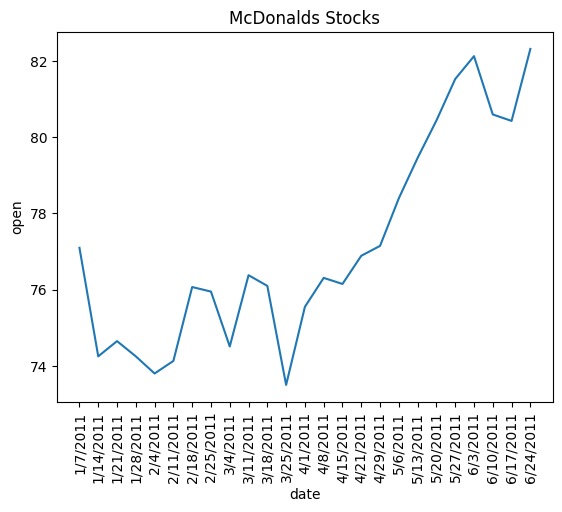

In [ ]:
plot = sns.lineplot(x="date", y="open", data=df_mcd)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)
_ = plot.set_title("McDonalds Stocks")

Vamos também visualizar os valores de fechamento das ações ao longo do tempo.

<ipython-input-28-705c717d2cdf>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)


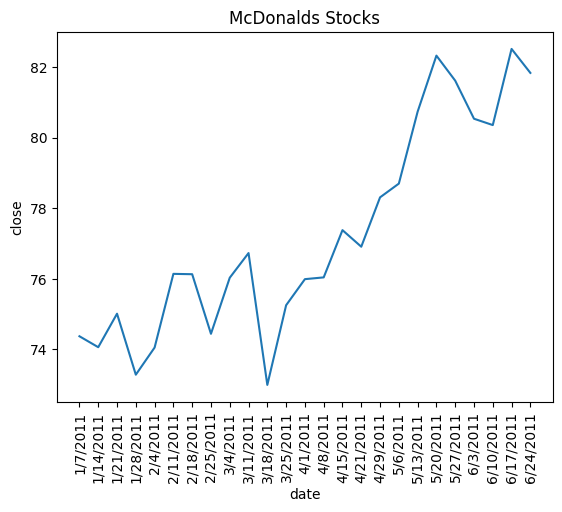

In [ ]:
plot = sns.lineplot(x="date", y="close", data=df_mcd)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)
_ = plot.set_title("McDonalds Stocks")

Para facilitar a comparação, vamo visualizar os quatro valores no mesmo gráfico.

<ipython-input-29-c42625fa481d>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)


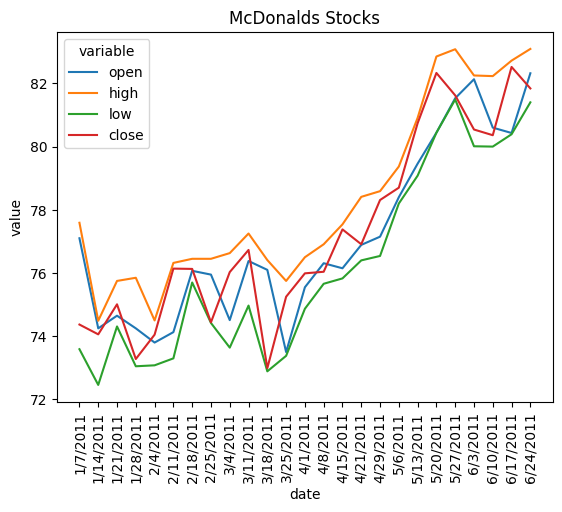

In [ ]:
plot = sns.lineplot(x="date", y="value", hue='variable', data=pd.melt(df_mcd, ['date']))
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)
_ = plot.set_title("McDonalds Stocks")

Para finalizar, vamos salvar o gráfico numa figura.

In [ ]:
plot.figure.savefig("./mcd.png", bbox_inches='tight')

**Agora é a sua vez,** faça o gráfico acima para a empresa Coca-Cola e salve a imagem com o nome `ko.png`.

Vamos visualizar os valores de abertura das ações ao longo do tempo.

<ipython-input-36-f289e28d61e5>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot_ko.set_xticklabels(labels=df_ko['date'], rotation=90)


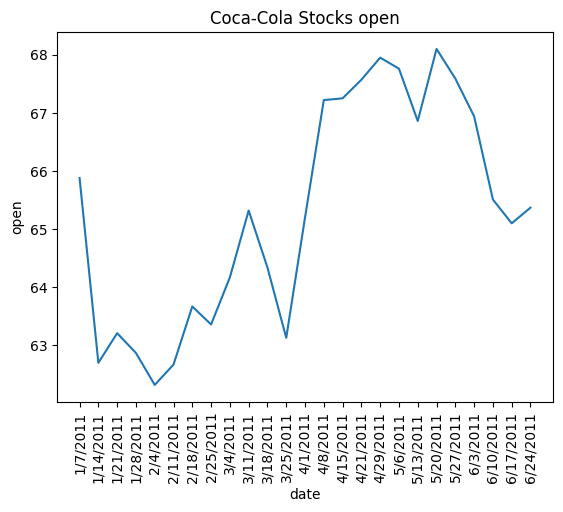

In [ ]:
plot_ko = sns.lineplot(x="date", y="open", data=df_ko)
_ = plot_ko.set_xticklabels(labels=df_ko['date'], rotation=90)
_ = plot_ko.set_title("Coca-Cola Stocks open")

Vamos também visualizar os valores de fechamento das ações ao longo do tempo.

<ipython-input-35-e28b2ce47d24>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot_ko.set_xticklabels(labels=df_ko['date'], rotation=90)


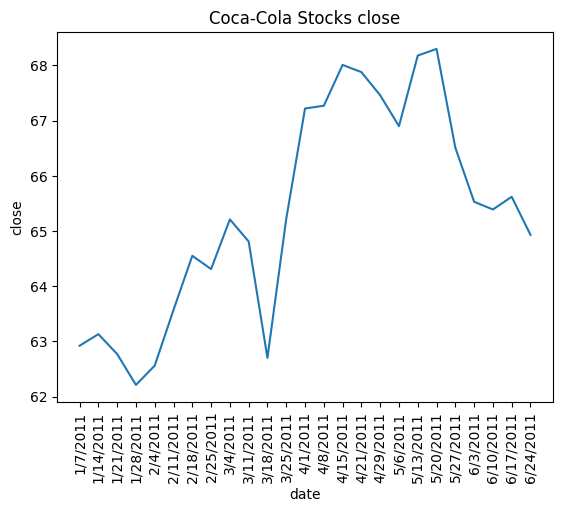

In [ ]:
plot_ko = sns.lineplot(x="date", y="close", data=df_ko)
_ = plot_ko.set_xticklabels(labels=df_ko['date'], rotation=90)
_ = plot_ko.set_title("Coca-Cola Stocks close")

Para facilitar a comparação, vamos visualizar os quatro valores no mesmo gráfico.

<ipython-input-33-e54e48adf4ad>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot_ko.set_xticklabels(labels=df_ko['date'], rotation=90)


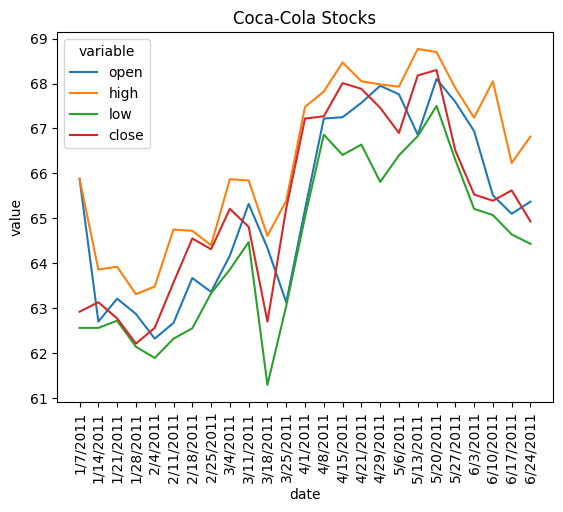

In [ ]:
plot_ko = sns.lineplot(x="date", y="value", hue='variable', data=pd.melt(df_ko, ['date']))
_ = plot_ko.set_xticklabels(labels=df_ko['date'], rotation=90)
_ = plot_ko.set_title("Coca-Cola Stocks")

Para finalizar, vamos salvar o gráfico numa figura.

In [ ]:
plot_ko.figure.savefig("./ko.png", bbox_inches='tight')

Analise as duas imagens e escreva pelo menos um *insight* que você consegue extrair dos dados. Fique a vontade para escrever quantos *insights* você quiser.

Obs: *Insights* são observações sobre o que você percebe/entende/interpreta em suas análises. No caso deste exercício, você vai analisar os dados dos gráficos da empresa McDonalds e da empresa Cola-Cola e notar o que os dados gerados podem ser interessante, que tipo de interpretação o comportamento dos dados estão te trazendo.

1 - Podemos perceber que o valor das ações de MCA (price 72-84) são maiores que de KO (price 61-69) no período analisado;

2 - Aparentemente, comparando o crescimento do valor, KO crece menos que MCA. KO varia 8 e MCA 12;

3 - No meio do período, final do mês 3, início do mês 4, ambas as ações mostram um crescimento.

4 - MCA mantem um crescimento aparentemente constante à partir do mês 4, quando KO sofre uma ligeira queda nas últimas 6 semanas, sendo que se mantinha estável nas duas últimas semanas do mês 4 e nas duas primeiras semanas do mês 5;

5 - O crescimento de MCA é mais demorado, de KO mais abrupto, porém MCA mantêm maior crescimento;

6 - Do início do período até o meio (aproximadamente final do mês 3), ambas estão estáveis, sendo que antes de começar a subir, KO teve a menor baixa do peróodo;

In [ ]:
import matplotlib.pyplot as plt

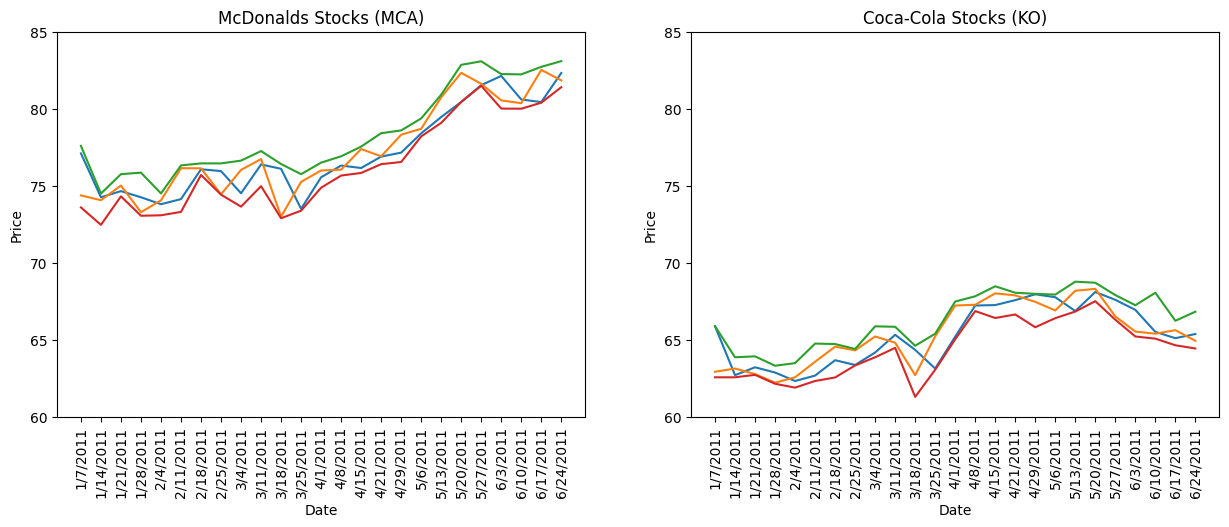

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title("McDonalds Stocks (MCA)")
plt.plot(df_mcd['date'], df_mcd['open'])
plt.plot(df_mcd['date'], df_mcd['close'])
plt.plot(df_mcd['date'], df_mcd['high'])
plt.plot(df_mcd['date'], df_mcd['low'])
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Price")
plt.ylim([60, 85])

plt.subplot(1, 2, 2)
plt.title("Coca-Cola Stocks (KO)")
plt.plot(df_ko['date'], df_ko['open'])
plt.plot(df_ko['date'], df_ko['close'])
plt.plot(df_ko['date'], df_ko['high'])
plt.plot(df_ko['date'], df_ko['low'])
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Price")
plt.ylim([60, 85])
plt.show()

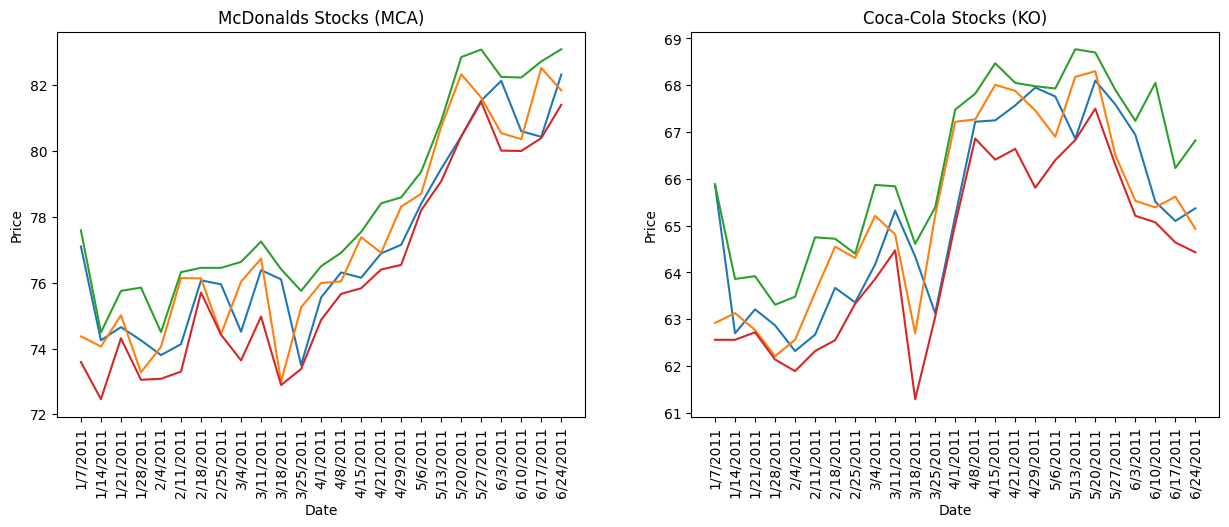

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title("McDonalds Stocks (MCA)")
plt.plot(df_mcd['date'], df_mcd['open'])
plt.plot(df_mcd['date'], df_mcd['close'])
plt.plot(df_mcd['date'], df_mcd['high'])
plt.plot(df_mcd['date'], df_mcd['low'])
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Price")
# plt.ylim([60, 85])

plt.subplot(1, 2, 2)
plt.title("Coca-Cola Stocks (KO)")
plt.plot(df_ko['date'], df_ko['open'])
plt.plot(df_ko['date'], df_ko['close'])
plt.plot(df_ko['date'], df_ko['high'])
plt.plot(df_ko['date'], df_ko['low'])
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Price")
# plt.ylim([60, 85])
plt.show()



---

